In [10]:
# Code to unzip a TAR file on Windows or Mac. NOTE: Run only once to unzip
# import tarfile 
# file = tarfile.open('VIAJES/202406_Viajes_distritos.tar') # open file, a zipped folder containing all data monthly (typically in .tar format)
# file.extractall('VIAJES/basicos_distritos_viajes_202406') # extracting file, unzipped folder containing several files
# file.close() 

In [1]:
import config as cfg
import os
import pandas as pd
from utils import get_overview, open_gz, filter_district

In [2]:
geometria_dir = cfg.GEOMETRIA_DATA
personas_dir = cfg.PERSONAS_DATA
viajes_dir = cfg.VIAJES_DATA

In [3]:
# FIXME: Figure out how to open OD_rutas ('Error tokenizing data'), and download rutas properly
# rutas = pd.read_csv(geometria_dir/'20220801_calidad_rutas.csv', encoding='latin1', sep=';')

In [4]:
# get_overview(viajes)

In [11]:
viajes_1 = open_gz(viajes_dir / 'basicos_distritos_viajes_202406', 0) # substracting all trips in all districts of Spain during day 1st of June

/Users/caro/Desktop/thesis_project/mobility_data/utils.py:30: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, compression='gzip', sep='|')


In [12]:
viajes_1.shape

(20207303, 15)

In [13]:
viajes_1.head()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
0,20240601,10,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.300,35.172
1,20240601,11,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.300,39.108
2,20240601,14,01009_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.531,51.761
3,20240601,21,01017_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,4.192,53.032
4,20240601,8,01047_AM,01001,10-50,frecuente,casa,no,no,1,10-15,NaN,NaN,2.350,104.429


In [14]:
viajes_1.tail()

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
20207298,20240601,13,0801907,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,>15,45-65,mujer,3.053,2484.267
20207299,20240601,8,2906711,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,10-15,45-65,NaN,3.287,684.447
20207300,20240601,12,2906709,5200108,>50,no_frecuente,trabajo_estudio,no,no,52,>15,65-100,NaN,1.742,361.148
20207301,20240601,17,20067,FRI15,10-50,no_frecuente,trabajo_estudio,no,no,20,10-15,0-25,hombre,3.242,32.595
20207302,20240601,11,2004504,FRI15,2-10,no_frecuente,trabajo_estudio,no,no,31,10-15,NaN,NaN,5.026,26.125


In [15]:
madrid_1 = filter_district(viajes_1, '28079')
len(madrid_1)

359879

In [16]:
madrid_1.describe()

,fecha,periodo,residencia,viajes,viajes_km
count,359879.0,359879.000000,359879.000000,359879.000000,359879.000000
mean,20240601.0,13.369241,27.755807,7.898976,22.358912
std,0.0,6.181548,6.032296,17.105964,28.635283
min,20240601.0,0.000000,1.000000,1.000000,0.509000
25%,20240601.0,9.000000,28.000000,2.959000,6.613000
50%,20240601.0,14.000000,28.000000,4.093000,14.103000
75%,20240601.0,18.000000,28.000000,6.963000,28.019000
max,20240601.0,23.000000,52.000000,627.112000,728.275000


In [17]:
madrid_1.head(10)

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
1294585,20240601,0,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,161.274,135.862
1294586,20240601,0,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,143.875,134.446
1294587,20240601,1,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,71.225,51.225
1294588,20240601,1,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,73.534,65.380
1294589,20240601,2,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,38.566,41.961
1294590,20240601,2,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,51.153,50.178
1294591,20240601,3,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,10.518,9.605
1294592,20240601,3,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,hombre,15.985,18.915
1294593,20240601,4,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,21.036,24.183
1294594,20240601,5,2807901,2807901,0.5-2,frecuente,casa,no,no,28,>15,0-25,mujer,7.012,11.301


In [18]:
madrid_1.tail(10)

,fecha,periodo,origen,destino,distancia,actividad_origen,actividad_destino,estudio_origen_posible,estudio_destino_posible,residencia,renta,edad,sexo,viajes,viajes_km
20064945,20240601,20,2807916,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,1.844,4.655
20064946,20240601,21,2807916,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,10-15,65-100,hombre,3.898,27.821
20064947,20240601,21,2807916,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,1.844,8.894
20064948,20240601,13,2807919,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,3.015,27.233
20064949,20240601,9,2807920,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,10-15,65-100,mujer,3.407,13.828
20064950,20240601,16,2807920,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,10-15,65-100,hombre,1.949,4.333
20064951,20240601,12,2807921,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,10-15,65-100,mujer,3.407,8.668
20064952,20240601,12,2807921,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,7.695,18.696
20064953,20240601,12,2807921,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,hombre,1.844,3.872
20064954,20240601,23,2807921,2807921,2-10,no_frecuente,trabajo_estudio,no,no,28,>15,65-100,mujer,1.954,5.489


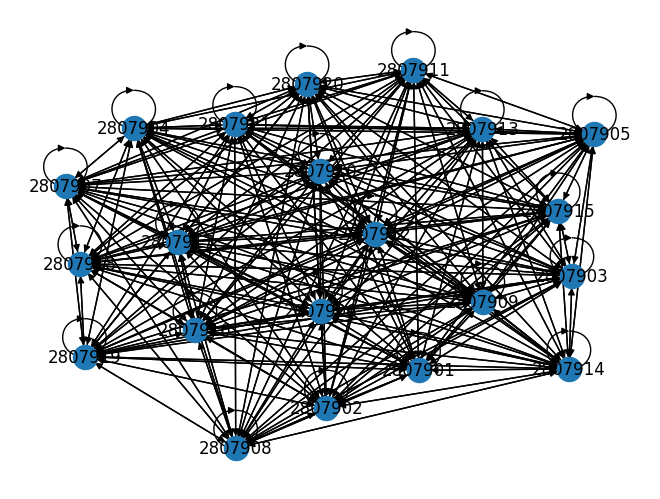

In [19]:
import networkx as nx

low_income = madrid_1[madrid_1['renta'] == '<10']
high_income = madrid_1[madrid_1['renta'] == '>15']

# Initialize the graph
G = nx.DiGraph()

# Add edges for low income
for idx, row in low_income.iterrows():
    G.add_edge(row['origen'], row['destino'], weight=row['viajes'], type='low_income')

# Add edges for high income
for idx, row in high_income.iterrows():
    G.add_edge(row['origen'], row['destino'], weight=row['viajes'], type='high_income')

# You can also add nodes and attributes as needed
for node in G.nodes():
    G.nodes[node]['attribute'] = 'value'  # Add more attributes as needed

# Now you can analyze or visualize the network
nx.draw(G, with_labels=True)

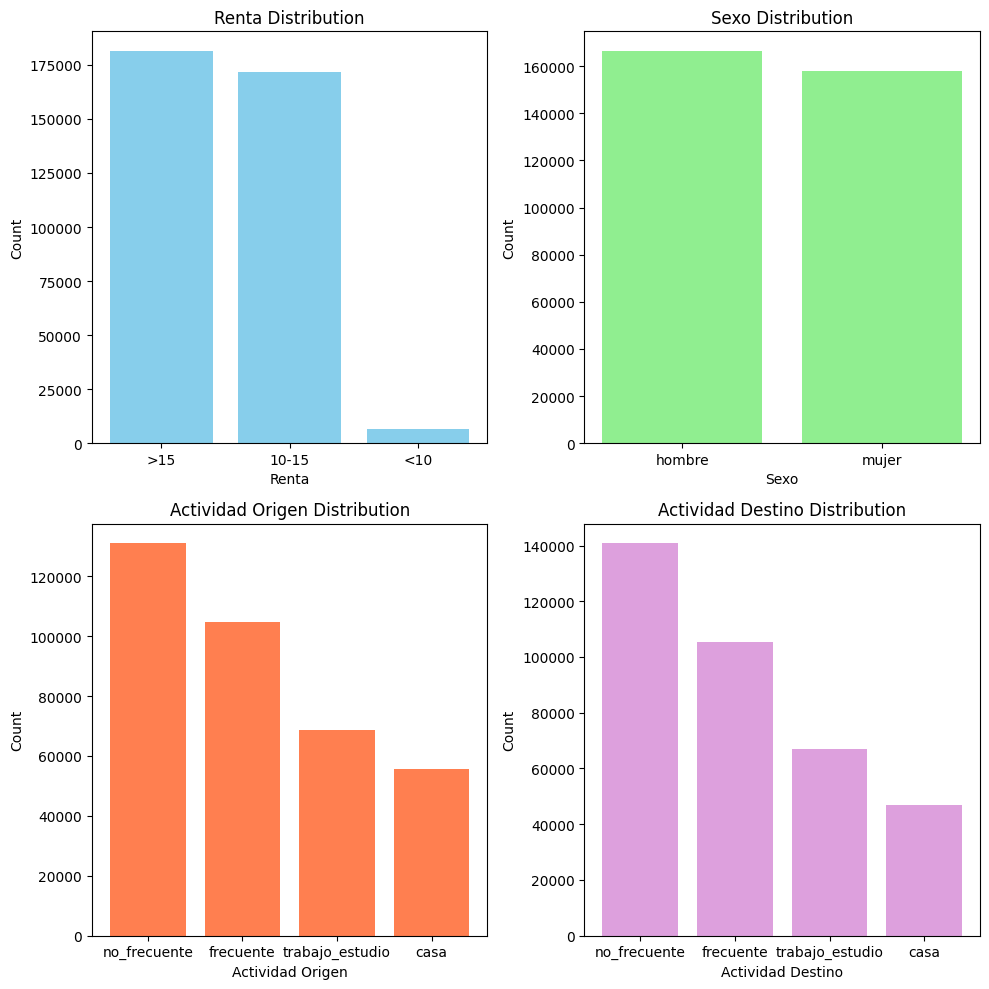

In [20]:
import matplotlib.pyplot as plt
# Get distribution of renta
renta_distribution = madrid_1['renta'].value_counts()

# Get distribution of sexo
sexo_distribution = madrid_1['sexo'].value_counts()

# Get distribution of actividad_origen and actividad_destino
actividad_origen_distribution = madrid_1['actividad_origen'].value_counts()
actividad_destino_distribution = madrid_1['actividad_destino'].value_counts()

# Plot distributions
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

# Renta distribution
axes[0, 0].bar(renta_distribution.index, renta_distribution.values, color='skyblue')
axes[0, 0].set_title('Renta Distribution')
axes[0, 0].set_xlabel('Renta')
axes[0, 0].set_ylabel('Count')

# Sexo distribution
axes[0, 1].bar(sexo_distribution.index, sexo_distribution.values, color='lightgreen')
axes[0, 1].set_title('Sexo Distribution')
axes[0, 1].set_xlabel('Sexo')
axes[0, 1].set_ylabel('Count')

# Actividad Origen distribution
axes[1, 0].bar(actividad_origen_distribution.index, actividad_origen_distribution.values, color='coral')
axes[1, 0].set_title('Actividad Origen Distribution')
axes[1, 0].set_xlabel('Actividad Origen')
axes[1, 0].set_ylabel('Count')

# Actividad Destino distribution
axes[1, 1].bar(actividad_destino_distribution.index, actividad_destino_distribution.values, color='plum')
axes[1, 1].set_title('Actividad Destino Distribution')
axes[1, 1].set_xlabel('Actividad Destino')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

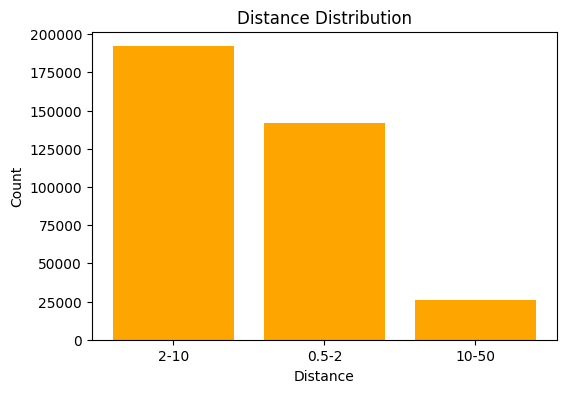

In [21]:
distancia_distribution = madrid_1['distancia'].value_counts()

# Plot distance distribution
plt.figure(figsize=(6, 4))
plt.bar(distancia_distribution.index, distancia_distribution.values, color='orange')
plt.title('Distance Distribution')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

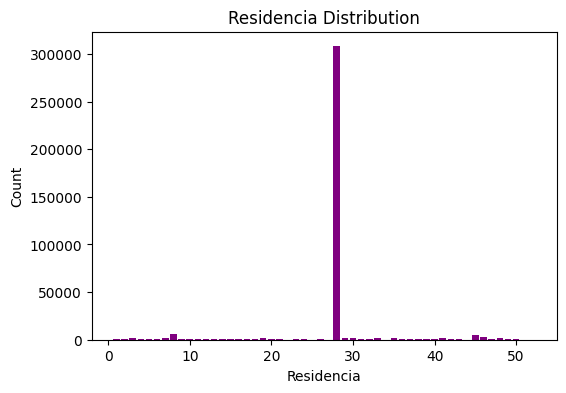

In [22]:
# Get distribution of residencia
residencia_distribution = madrid_1['residencia'].value_counts()

# Plot residencia distribution
plt.figure(figsize=(6, 4))
plt.bar(residencia_distribution.index, residencia_distribution.values, color='purple')
plt.title('Residencia Distribution')
plt.xlabel('Residencia')
plt.ylabel('Count')
plt.show()
